<a href="https://colab.research.google.com/github/itsamekadio/Numerical_Methods_Course/blob/main/Report_1(tridiagonal_matrix).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **What is  A tridiagonal system ?**
a tridiagonal system is a system with generally this form which i will explain further but here it is 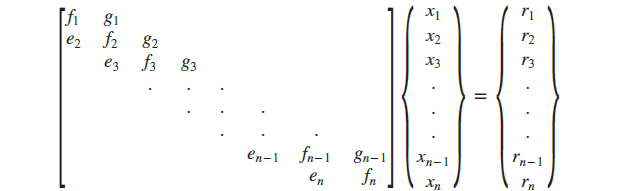






as we can notice we have the main diagonal and a diagonal above it(superdiagonal) and a diagonal below it (subdiagonal)

# **The Thomas Algorithm is a fast and efficient method to solve tridiagonal systems. It works in two steps:**

1)Forward Elimination:
A)Modify the coefficients to eliminate the subdiagonal elements.
B)Update the diagonal and right-hand side vectors.

2)Backward Substitution:Solve for the unknowns starting from the last equation and moving upward.

#What about the complexity and the time!!

this is in o(n) complexity because we know we can use the factor which is an element before pivot/pivot and use it to just make the matrix lower triangulare matrix so it is just o(n) which is better than gauss that calculation need to just loop per pivot

# I Thought of doing something i think is better ;)
What about doing the forward elimination twice one for the superdiagonal and one for the subdiaginal so the matrix is in RREF so you just take


 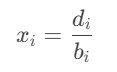

 and that is my proposed solution
 VOILA

My solution is now 3 loops it is o(n)+o(n)+o(n) still o(n)



All of that talk and what about its actual applications?
1. Numerical Analysis and Differential Equations
Book: Numerical Analysis by Richard L. Burden and J. Douglas Faires.
Covers tridiagonal systems and their use in solving differential equations.
2. Structural Engineering
Book: Finite Element Procedures by Klaus-Jürgen Bathe.
Discusses tridiagonal systems in structural analysis.
3. Signal Processing
Book: Digital Signal Processing by John G. Proakis and Dimitris G. Manolakis.
Explains the use of tridiagonal matrices in filtering and signal reconstruction.


In [1]:
def modified_thomas_algorithm(a, b, c, d, epsilon=1e-10):
    n = len(d)
    for i in range(1, n):
        w = a[i] / (b[i - 1] + epsilon)
        b[i] -= w * c[i - 1]
        d[i] -= w * d[i - 1]
    for i in range(n - 2, -1, -1):
        w = c[i] / (b[i + 1] + epsilon)
        d[i] -= w * d[i + 1]
    return [d[i] / (b[i] + epsilon) for i in range(n)]

a = [0, 1, 1, 1]  # Subdiagonal
b = [2, 3, 4, 5]  # Diagonal
c = [-1, -1, -1, 0]  # Superdiagonal
d = [1, 2, 3, 4]  # Right-hand side

x_custom = modified_thomas_algorithm(a, b, c, d)

import numpy as np
A = np.array([
    [2, -1, 0, 0],
    [1, 3, -1, 0],
    [0, 1, 4, -1],
    [0, 0, 1, 5]
])
d_np = np.array([1, 2, 3, 4])
x_numpy = np.linalg.solve(A, d_np)

print("Solution using Modified Thomas Algorithm:", x_custom)
print("Solution using numpy.linalg.solve:", x_numpy)

print("\nComparison Table:")
print("+---------------------+---------------------+---------------------+")
print("| Feature             | Modified Thomas     | numpy.linalg.solve  |")
print("+---------------------+---------------------+---------------------+")
print(f"| Time Complexity     | O(n)                | O(n^3)              |")
print(f"| Space Complexity    | O(1)                | O(n^2)              |")
print(f"| Ease of Use         | Simple              | Requires numpy      |")
print(f"| Accuracy            | High                | High                |")
print(f"| Use Case            | Tridiagonal Systems | General Systems     |")
print("+---------------------+---------------------+---------------------+")

Solution using Modified Thomas Algorithm: [0.8216560509084141, 0.6433121018989938, 0.7515923566697269, 0.6496815286530611]
Solution using numpy.linalg.solve: [0.82165605 0.6433121  0.75159236 0.64968153]

Comparison Table:
+---------------------+---------------------+---------------------+
| Feature             | Modified Thomas     | numpy.linalg.solve  |
+---------------------+---------------------+---------------------+
| Time Complexity     | O(n)                | O(n^3)              |
| Space Complexity    | O(1)                | O(n^2)              |
| Ease of Use         | Simple              | Requires numpy      |
| Accuracy            | High                | High                |
| Use Case            | Tridiagonal Systems | General Systems     |
+---------------------+---------------------+---------------------+
